In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

## Load Iris Dataset

In [2]:
iris = load_iris()

In [3]:
dataDF = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
dataDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Data Privacy variables
## &
# Data Privacy Methods

In [5]:
# DP = differnetial Privacy
# DP = f(x) + L(0,b)

# b = value used to generate random noise
# b = Deltaf / epsilon

# Deltaf = difference between highest and lowest observations
# Deltaf = abs(max(f(x)) - min(f(x)))

# epsilon is arbitrary value set by curator
# epsilon is between 0 and 1




#### Calculate $\Delta$ f

In [6]:
deltaf_sepal_length = np.abs(dataDF['sepal length (cm)'].max() - dataDF['sepal length (cm)'].min())
deltaf_sepal_width = np.abs(dataDF['sepal width (cm)'].max() - dataDF['sepal width (cm)'].min())
deltaf_petal_length = np.abs(dataDF['petal length (cm)'].max() - dataDF['petal length (cm)'].min())
deltaf_petal_width = np.abs(dataDF['petal width (cm)'].max() - dataDF['petal width (cm)'].min())


print("\u0394f sepal length: {}".format(deltaf_sepal_length))
print("\u0394f sepal width: {}".format(deltaf_sepal_width))
print("\u0394f petal length: {}".format(deltaf_petal_length))
print("\u0394f petal width: {}".format(deltaf_petal_width))

Δf sepal length: 3.6000000000000005
Δf sepal width: 2.4000000000000004
Δf petal length: 5.9
Δf petal width: 2.4


### Choose arbitrary epsilon

In [7]:
epsilon = 0.15

### Calculate b

In [8]:
# b = value used to generate random noise
# b = Deltaf / epsilon
b_sepal_length = deltaf_sepal_length / epsilon
b_sepal_width = deltaf_sepal_width / epsilon
b_petal_length = deltaf_petal_length / epsilon
b_petal_width = deltaf_petal_width / epsilon


print("b sepal length: {}".format(b_sepal_length))
print("b sepal width: {}".format(b_sepal_width))
print("b petal length: {}".format(b_petal_length))
print("b petal width: {}".format(b_petal_width))

b sepal length: 24.000000000000004
b sepal width: 16.000000000000004
b petal length: 39.333333333333336
b petal width: 16.0


In [9]:
random.uniform(0, b_sepal_length)

23.61601276978257

In [10]:
laplace_noise_sepal_length = np.random.laplace(loc=(b_sepal_length/2.0), scale=1)
laplace_noise_sepal_width = np.random.laplace(loc=(b_sepal_width/2.0), scale=1)
laplace_noise_petal_length = np.random.laplace(loc=(b_petal_length/2.0), scale=1)
laplace_noise_petal_width = np.random.laplace(loc=(b_petal_width/2.0), scale=1)

print("laplace_noise_sepal_length: {}".format(laplace_noise_sepal_length))
print("laplace_noise_sepal_width: {}".format(laplace_noise_sepal_width))
print("laplace_noise_petal_length: {}".format(laplace_noise_petal_length))
print("laplace_noise_petal_width: {}".format(laplace_noise_petal_width))

laplace_noise_sepal_length: 12.453376476625102
laplace_noise_sepal_width: 8.121385923119734
laplace_noise_petal_length: 25.54251232598562
laplace_noise_petal_width: 9.055709254807846


In [11]:
sepal_length_array = dataDF['sepal length (cm)'].values.tolist()
Private_SL_array = [x + laplace_noise_sepal_length for x in sepal_length_array]

sepal_width_array = dataDF['sepal width (cm)'].values.tolist()
Private_SW_array = [x + laplace_noise_sepal_width for x in sepal_width_array]

petal_length_array = dataDF['petal length (cm)'].values.tolist()
Private_PL_array = [x + laplace_noise_petal_length for x in petal_length_array]

petal_width_array = dataDF['petal width (cm)'].values.tolist()
Private_PW_array = [x + laplace_noise_petal_width for x in petal_width_array]




In [12]:

private_list_all_data = list(zip(Private_SL_array,Private_SW_array,Private_PL_array,Private_PW_array,))
private_column_names = ['Privatized Sepal Length', 'Privatized Sepal Width','Privatized Petal Length','Privatized Petal Width']

In [13]:
privateDF = pd.DataFrame(private_list_all_data,
                  columns = private_column_names) 

In [14]:
privateDF.head()

,Privatized Sepal Length,Privatized Sepal Width,Privatized Petal Length,Privatized Petal Width
0,17.553376,11.621386,26.942512,9.255709
1,17.353376,11.121386,26.942512,9.255709
2,17.153376,11.321386,26.842512,9.255709
3,17.053376,11.221386,27.042512,9.255709
4,17.453376,11.721386,26.942512,9.255709


In [15]:
privateDF.tail()

,Privatized Sepal Length,Privatized Sepal Width,Privatized Petal Length,Privatized Petal Width
145,19.153376,11.121386,30.742512,11.355709
146,18.753376,10.621386,30.542512,10.955709
147,18.953376,11.121386,30.742512,11.055709
148,18.653376,11.521386,30.942512,11.355709
149,18.353376,11.121386,30.642512,10.855709


In [16]:
SLstddev = dataDF['sepal length (cm)'].std()
SWstddev = dataDF['sepal width (cm)'].std()
PLstddev = dataDF['petal length (cm)'].std()
PWstddev = dataDF['petal width (cm)'].std()
print("Given Sepal Length standard dev: {}".format(SLstddev))
print("Given Sepal Width standard dev: {}".format(SWstddev))
print("Given Petal Length standard dev: {}".format(PLstddev))
print("Given Petal Width standard dev: {}".format(PWstddev))

Given Sepal Length standard dev: 0.828066127977863
Given Sepal Width standard dev: 0.4358662849366982
Given Petal Length standard dev: 1.7652982332594662
Given Petal Width standard dev: 0.7622376689603465


In [17]:
pSLstddev = privateDF['Privatized Sepal Length'].std()
pSWstddev = privateDF['Privatized Sepal Width'].std()
pPLstddev = privateDF['Privatized Petal Length'].std()
pPWstddev = privateDF['Privatized Petal Width'].std()
print("Privatized Sepal Length standard dev: {}".format(pSLstddev))
print("Privatized Sepal Width standard dev: {}".format(pSWstddev))
print("Privatized Petal Length standard dev: {}".format(pPLstddev))
print("Privatized Petal Width standard dev: {}".format(pPWstddev))

Privatized Sepal Length standard dev: 0.8280661279778628
Privatized Sepal Width standard dev: 0.43586628493669827
Privatized Petal Length standard dev: 1.7652982332594664
Privatized Petal Width standard dev: 0.7622376689603467


In [18]:
print("Given Sepal Length mean: {}".format(dataDF['sepal length (cm)'].mean()))
print("Given Sepal Width mean: {}".format(dataDF['sepal width (cm)'].mean()))
print("Given Petal Length mean: {}".format(dataDF['petal length (cm)'].mean()))
print("Given Petal Width mean: {}".format(dataDF['petal width (cm)'].mean()))

Given Sepal Length mean: 5.843333333333334
Given Sepal Width mean: 3.0573333333333337
Given Petal Length mean: 3.7580000000000005
Given Petal Width mean: 1.1993333333333336


In [19]:
print("Privatized Sepal Length mean: {}".format(privateDF['Privatized Sepal Length'].mean()))
print("Privatized Sepal Width mean: {}".format(privateDF['Privatized Sepal Width'].mean()))
print("Privatized Petal Length mean: {}".format(privateDF['Privatized Petal Length'].mean()))
print("Privatized Petal Width mean: {}".format(privateDF['Privatized Petal Width'].mean()))


Privatized Sepal Length mean: 18.296709809958436
Privatized Sepal Width mean: 11.178719256453068
Privatized Petal Length mean: 29.30051232598562
Privatized Petal Width mean: 10.25504258814118


No handles with labels found to put in legend.


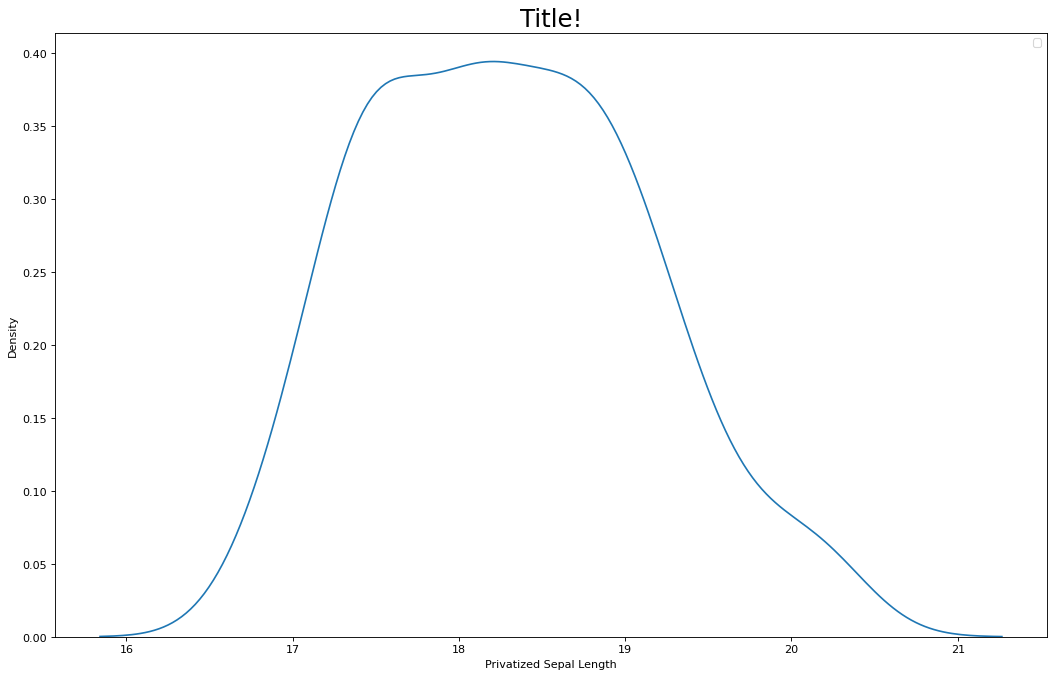

In [20]:
plt.figure(figsize=(16,10), dpi= 80)

sns.kdeplot(data=privateDF['Privatized Sepal Length'])
plt.title('Title!', fontsize=22)
plt.legend()
plt.show()

<AxesSubplot:ylabel='Density'>

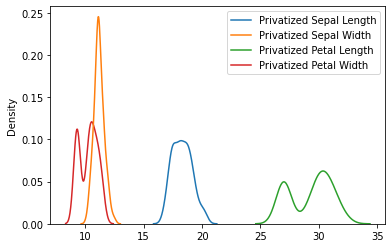

In [21]:
sns.kdeplot(data=privateDF)

<AxesSubplot:ylabel='Density'>

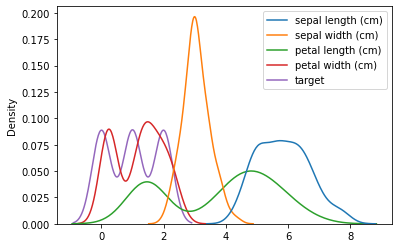

In [22]:
sns.kdeplot(data=dataDF)